We know we have a dataset of posters from films from different years categories and genres.

The first questions which come in mind. 

- How many images do i have?
- Whats the distribution per year?
- Which genres do i have.

Before you can go further please run load_data.ipynb to get the data. Year 1992 has metadata but no images so this year is skipped.

In [42]:
import pandas as pd

dataset = pd.read_excel('./data/data.xlsx')
print(dataset.shape)
dataset

(8064, 10)


,imdbid,genre,filename,path,extension,width,height,file_size_kb,aspect_ratio,year
0,tt0080684,"Action, Adventure, Fantasy",tt0080684.jpg,Movie_Poster_Dataset/1980/tt0080684.jpg,jpg,300,444,32.535156,0.675676,1980.0
1,tt0081562,"Comedy, Crime",tt0081562.jpg,Movie_Poster_Dataset/1980/tt0081562.jpg,jpg,300,438,42.684570,0.684932,1980.0
2,tt0080339,Comedy,tt0080339.jpg,Movie_Poster_Dataset/1980/tt0080339.jpg,jpg,300,444,30.916016,0.675676,1980.0
3,tt0080377,"Action, Comedy",tt0080377.jpg,Movie_Poster_Dataset/1980/tt0080377.jpg,jpg,300,432,42.120117,0.694444,1980.0
4,tt0081375,"Comedy, War",tt0081375.jpg,Movie_Poster_Dataset/1980/tt0081375.jpg,jpg,300,444,30.539062,0.675676,1980.0
...,...,...,...,...,...,...,...,...,...,...
8059,tt4159182,Thriller,tt4159182.jpg,Movie_Poster_Dataset/2015/tt4159182.jpg,jpg,300,443,30.335938,0.677201,2015.0
8060,tt2265431,"Comedy, Drama, Romance",tt2265431.jpg,Movie_Poster_Dataset/2015/tt2265431.jpg,jpg,300,419,39.723633,0.715990,2015.0
8061,tt3240784,Documentary,tt3240784.jpg,Movie_Poster_Dataset/2015/tt3240784.jpg,jpg,300,442,41.201172,0.678733,2015.0
8062,tt2912776,"Drama, Music",tt2912776.jpg,Movie_Poster_Dataset/2015/tt2912776.jpg,jpg,300,444,21.246094,0.675676,2015.0


Before we start with image processing we should now what the width and the height should be for every image.

In [37]:
import numpy as np

median_width = np.median(dataset['width'])
median_height = np.median(dataset['height'])

## What do we know about the images.

Total images: 8064
Most common dimension: 300x444 (1073 images, 13.3%)
Smallest dimension: 89x132 (11748 pixels)
Largest dimension: 300x542 (162600 pixels)


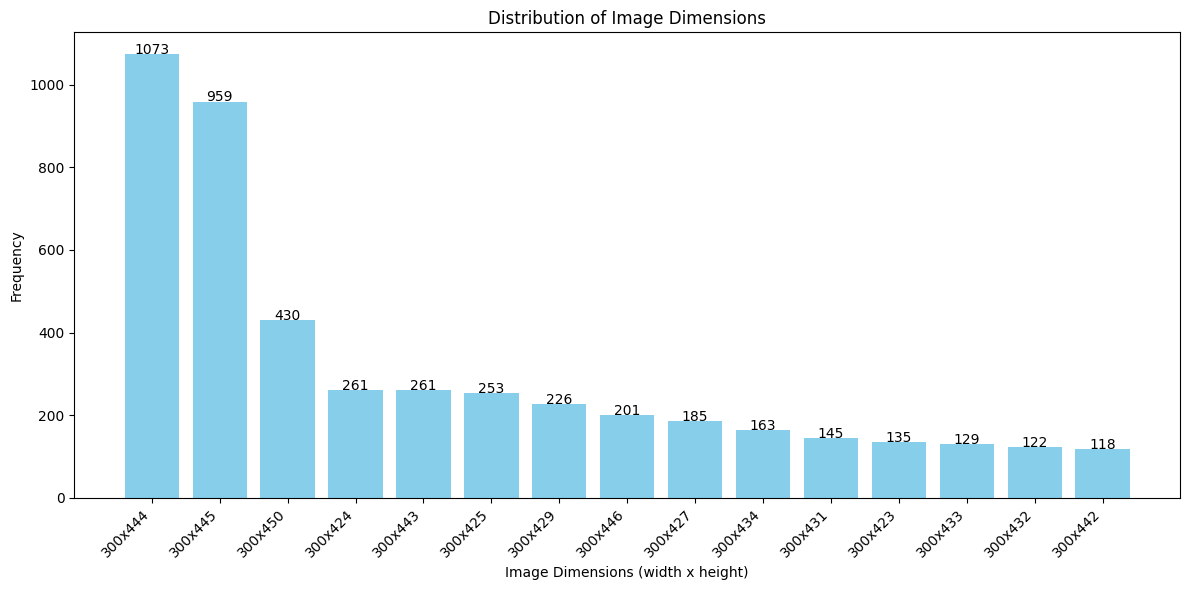

In [ ]:
import matplotlib.pyplot as plt

# Count image dimensions
areas = {}
for _, row in dataset.iterrows():
    dim = f"{row['width']}x{row['height']}"
    areas[dim] = areas.get(dim, 0) + 1

# Sort by frequency
sorted_dims = sorted(areas.items(), key=lambda x: x[1], reverse=True)

# Visualize top 15 dimensions
plt.figure(figsize=(12, 6))
labels, counts = zip(*sorted_dims[:15])
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Image Dimensions (width x height)')
plt.ylabel('Frequency')
plt.title('Distribution of Image Dimensions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

# Calculate stats
total_images = sum(areas.values())
most_common = sorted_dims[0]
dim_areas = {dim: int(dim.split('x')[0]) * int(dim.split('x')[1]) for dim in areas}
smallest = min(dim_areas.items(), key=lambda x: x[1])
largest = max(dim_areas.items(), key=lambda x: x[1])

# Print summary
print(f"Total images: {total_images}")
print(f"Most common dimension: {most_common[0]} ({most_common[1]} images, {most_common[1]/total_images:.1%})")
print(f"Smallest dimension: {smallest[0]} ({smallest[1]} pixels)")
print(f"Largest dimension: {largest[0]} ({largest[1]} pixels)")


Now since we parsed the metadata we can find out some more information about the dataset.

In [ ]:
unique_genres = set()

for movie_genres in dataset['genre']:
    if not movie_genres or  isinstance(movie_genres, float):
        continue
    movie_genres = movie_genres.split(',')
    for genre in movie_genres:
        unique_genres.add(genre.strip())

unique_genres = list(unique_genres)
unique_genres

['History',
 'Documentary',
 'News',
 'Crime',
 'Fantasy',
 'Thriller',
 'Biography',
 'Reality-TV',
 'War',
 'Sci-Fi',
 'Short',
 'Horror',
 'Romance',
 'Adventure',
 'Music',
 'Animation',
 'Mystery',
 'Action',
 'Musical',
 'Western',
 'Family',
 'Sport',
 'Drama',
 'Comedy']

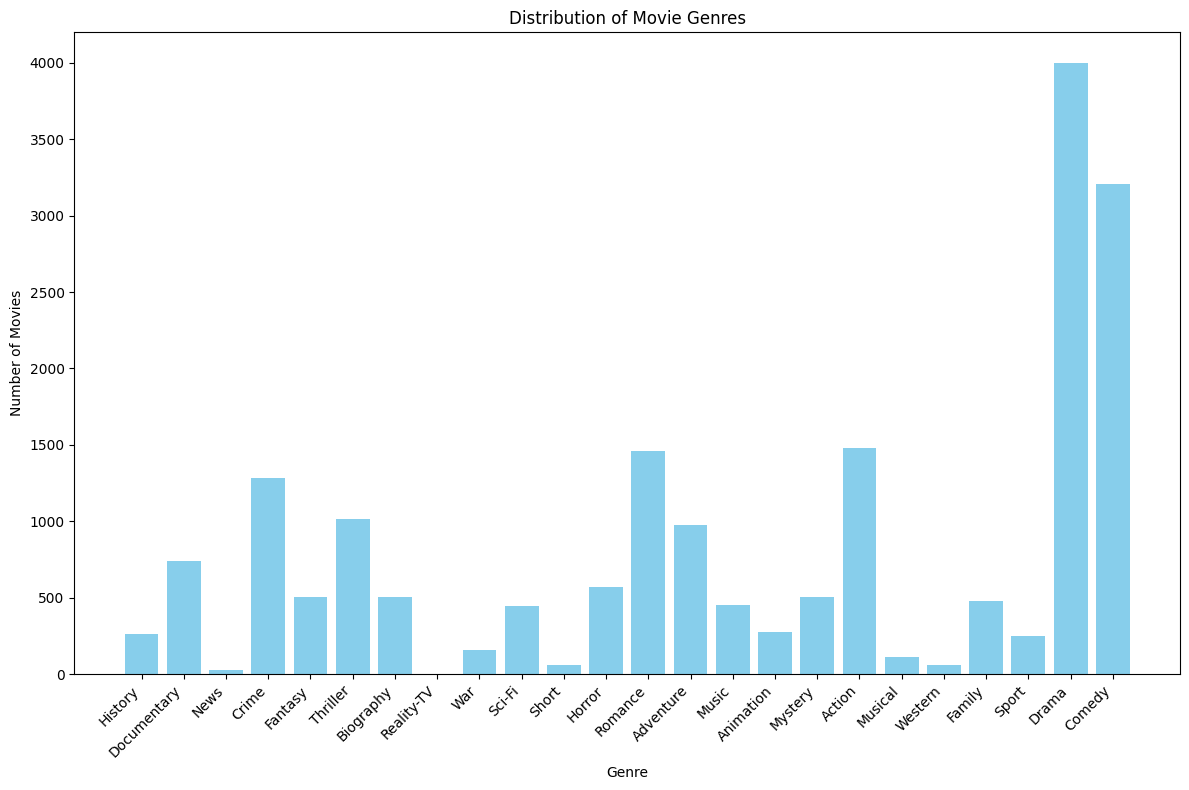

Total amount of images: 8064
Max number of images: 4000
Average number of images: 783.25
Minimum number of images: 2


In [ ]:
import matplotlib.pyplot as plt

genres_count = {genre: 0 for genre in unique_genres}

# Count occurrences of each genre
for movie_genres in dataset['genre']:
    if isinstance(movie_genres, str):
        for genre in unique_genres:
            if genre in movie_genres:
                genres_count[genre] += 1


# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres_count.keys(), genres_count.values(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print(f"Total amount of images: {len(dataset)}")
print(f"Max number of images: {max(genres_count.values())}")
print(f"Average number of images: {sum(genres_count.values()) / len(genres_count):.2f}")
print(f"Minimum number of images: {min(genres_count.values())}")

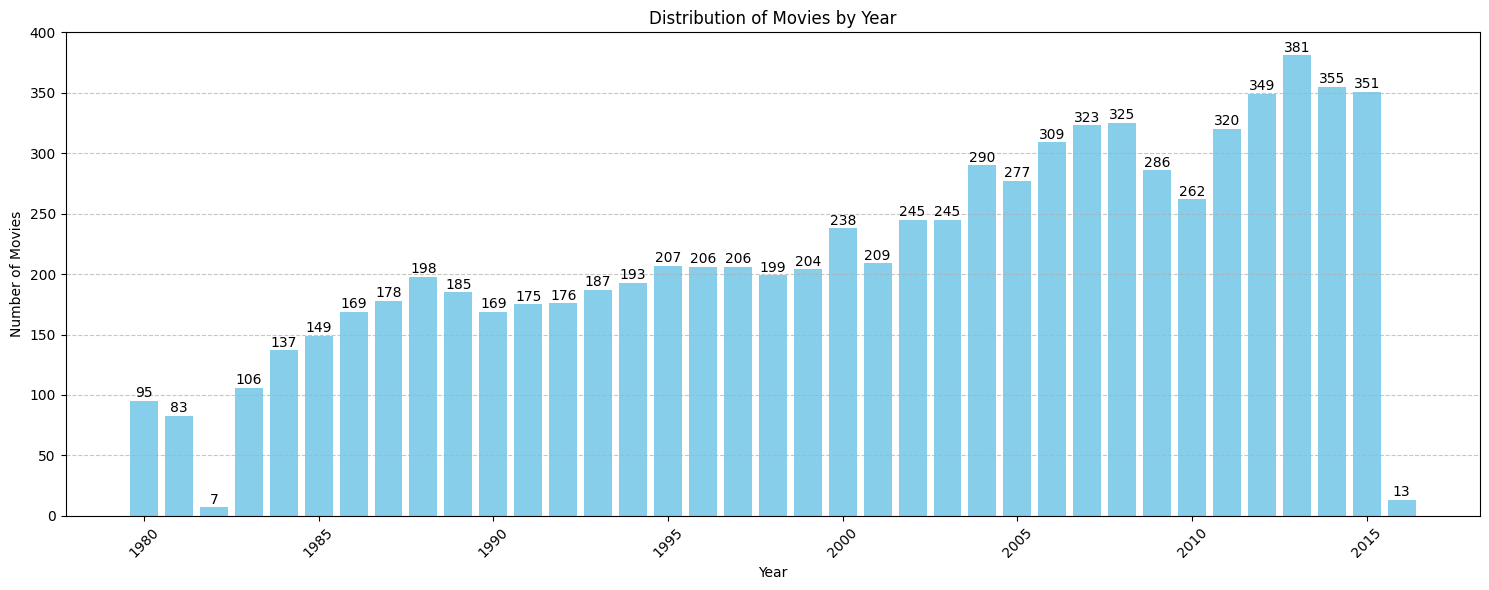

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count movies per year
year_counts = dataset['year'].value_counts().sort_index()

# Create the visualization
plt.figure(figsize=(15, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            str(int(height)), ha='center', va='bottom')

If you look at the images you can see some are landscape so we should first look how many there are.

In [ ]:
landscape = 0
landscape_images = []

for i,row in dataset.iterrows():
    width, height = row['width'], row['height']

    if width > height:
        landscape = landscape + 1
        landscape_images.append(row['imdbid'])

print(f"Amount of landscape images: {landscape}")
print(f"Percentage amount: {landscape / len(dataset) * 100}")

landscape_images

Amount of landscape images: 85
Percentage amount: 1.0540674603174605


We can see the landscape images are about a 1% of the dataset so we should remove them.

In [ ]:
dataset = dataset.loc[~dataset['imdbid'].isin(landscape_images), :]
dataset

,imdbid,genre,filename,path,extension,width,height,file_size_kb,year
0,tt0080684,"Action, Adventure, Fantasy",tt0080684.jpg,Movie_Poster_Dataset/1980/tt0080684.jpg,jpg,300,444,32.535156,1980.0
1,tt0081562,"Comedy, Crime",tt0081562.jpg,Movie_Poster_Dataset/1980/tt0081562.jpg,jpg,300,438,42.684570,1980.0
2,tt0080339,Comedy,tt0080339.jpg,Movie_Poster_Dataset/1980/tt0080339.jpg,jpg,300,444,30.916016,1980.0
3,tt0080377,"Action, Comedy",tt0080377.jpg,Movie_Poster_Dataset/1980/tt0080377.jpg,jpg,300,432,42.120117,1980.0
4,tt0081375,"Comedy, War",tt0081375.jpg,Movie_Poster_Dataset/1980/tt0081375.jpg,jpg,300,444,30.539062,1980.0
...,...,...,...,...,...,...,...,...,...
8059,tt4159182,Thriller,tt4159182.jpg,Movie_Poster_Dataset/2015/tt4159182.jpg,jpg,300,443,30.335938,2015.0
8060,tt2265431,"Comedy, Drama, Romance",tt2265431.jpg,Movie_Poster_Dataset/2015/tt2265431.jpg,jpg,300,419,39.723633,2015.0
8061,tt3240784,Documentary,tt3240784.jpg,Movie_Poster_Dataset/2015/tt3240784.jpg,jpg,300,442,41.201172,2015.0
8062,tt2912776,"Drama, Music",tt2912776.jpg,Movie_Poster_Dataset/2015/tt2912776.jpg,jpg,300,444,21.246094,2015.0


In [41]:
dataset.to_excel('./data/data.xlsx', index=False, engine='openpyxl')